In [42]:
#data cleaning - changing the genres to fit into the same category
import pandas as pd

df = pd.read_csv('dataset.csv')

#categorize documentary and horror genres
documentary_genres = ['Docuseries', 'Documentary', 'Travel documentary', 'Nature documentary', 'Nature docuseries',
                      'Coming-of-age documentary', 'Docu-drama miniseries', 'True crime docuseries',
                      'Documentary/Interactive fiction', 'Docu-series']

horror_genres = ['Horror', 'Horror drama', 'Period horror thriller','Horror anthology',
                 'Comedy horror','Zombie horror','Horror fantasy thriller','Supernatural coming-of-age horror',
                 'Horror-thriller','Supernatural horror','Science fiction horror','Found footage horror','Fantasy drama/Supernatural horror',
                 'Epic period mystery horror', 'Action horror', 'CG animation/Horror', 'Horror/thriller','Fantasy horror']

# find those tht contain the word 'drama' or 'Drama' in their genre and put them as 'Drama'
df.loc[df['Genre'].str.contains('Drama'), 'Genre'] = 'Drama'
df.loc[df['Genre'].str.contains('drama'), 'Genre'] = 'Drama'

# Loop and replace the genres
for index, row in df.iterrows():
    if row['Genre'] in documentary_genres:
        df.at[index, 'Genre'] = 'Documentaries'
    elif row['Genre'] in horror_genres:
        df.at[index, 'Genre'] = 'Horror'

#create a new and updated CSV file
df.to_csv('final.csv', index=False)

In [91]:
#counting # of genres in the csv file - create a new output to see how many genres found 
import pandas as pd

df = pd.read_csv('final.csv')

# Count # of movies for each genre
genre_counts = df['Genre'].value_counts()

# Create a new DataFrame to store the genre counts
genre_counts_df = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

display(genre_counts)

#to see the full list, print to csv file 
genre_counts_df.to_csv('genre_counts.csv', index=False)

Drama                        245
Documentaries                174
Family film                   99
Comedy                        78
Reality                       66
                            ... 
Science fiction/Action         1
Children's series              1
Supernatural/Action            1
Stop motion/Slice of life      1
Aftershow/Interview            1
Name: Genre, Length: 163, dtype: int64

/var/folders/b3/m6q17_ys3ds15bl6njz21wg80000gn/T/ipykernel_39133/1922730696.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_15_genres.index, rotation=90)


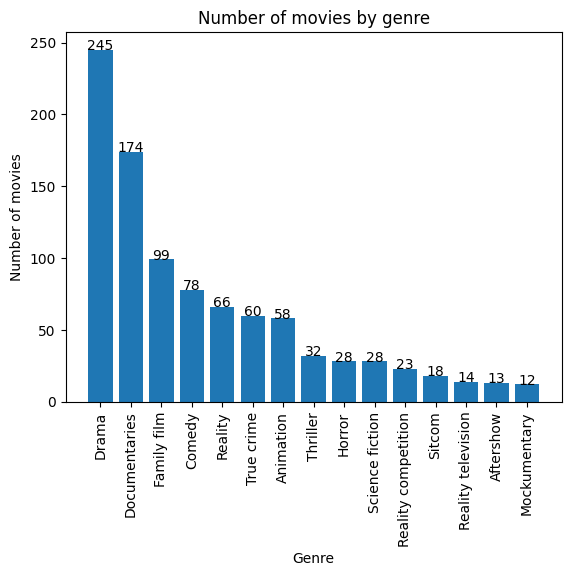

In [45]:
#creating a bar chart for # of genres in Netflix 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('final.csv')
genre_counts = df['Genre'].value_counts()

# get the top 15 genres
top_15_genres = genre_counts.head(15)

# create a bar chart
fig, ax = plt.subplots()
ax.bar(top_15_genres.index, top_15_genres.values)

#title and axis label
ax.set_title('Number of movies by genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of movies')

#read the tick marks better
ax.set_xticklabels(top_15_genres.index, rotation=90)

# add the values on the bars
for i, v in enumerate(top_15_genres.values):
    ax.text(i, v, str(v), ha='center')

plt.show()


In [46]:
#load data into an SQL table
import sqlite3
import csv

conn = sqlite3.connect('final_project.db')
cursor = conn.cursor()

# Create the table
cursor.execute('''CREATE TABLE IF NOT EXISTS final_project (
                    Title TEXT,
                    Genre TEXT,
                    [Premiere Date] DATE,
                    Language TEXT,
                    Country TEXT,
                    [IMDb Rating] REAL,
                    [IMDb Votes] REAL,
                    [Close Price] REAL
                 )''')

# Load table with data in the csv file
with open('final.csv', 'r') as f:
    next(f)  # Skip the header row
    reader = csv.reader(f)
    for row in reader:
        cursor.execute('INSERT INTO final_project (Title, Genre, [Premiere Date], Language, Country, [IMDb Rating], [IMDb Votes], [Close Price]) VALUES (?, ?, ?, ?, ?, ?, ?, ?)', row)


conn.commit()

# Close the cursor and the database connection
cursor.close()
conn.close()


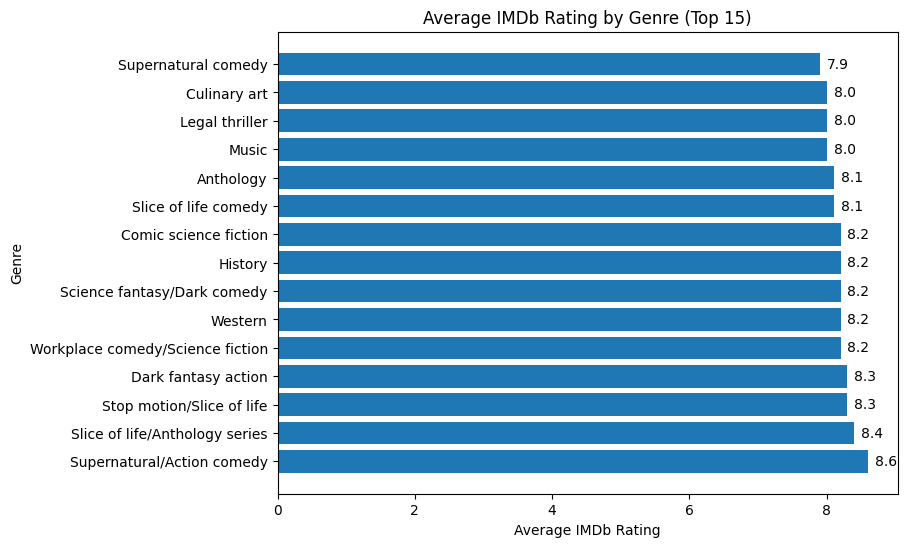

In [55]:
#get the average IMDB rating based on genres and create a bar chart
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('final_project.db')
cursor = conn.cursor()

#top 15 genres based on the average IMDb rating
cursor.execute('SELECT Genre, AVG([IMDb Rating]) FROM final_project GROUP BY Genre ORDER BY AVG([IMDb Rating]) DESC LIMIT 15')
rows = cursor.fetchall()

genres = [row[0] for row in rows]
ratings = [row[1] for row in rows]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(genres, ratings)
ax.set_xlabel('Average IMDb Rating')
ax.set_ylabel('Genre')
ax.set_title('Average IMDb Rating by Genre (Top 15)')

#show the value
for i, bar in enumerate(bars):
    rating = round(ratings[i], 2)
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(rating), ha='left', va='center')

plt.show()

cursor.close()
conn.close()

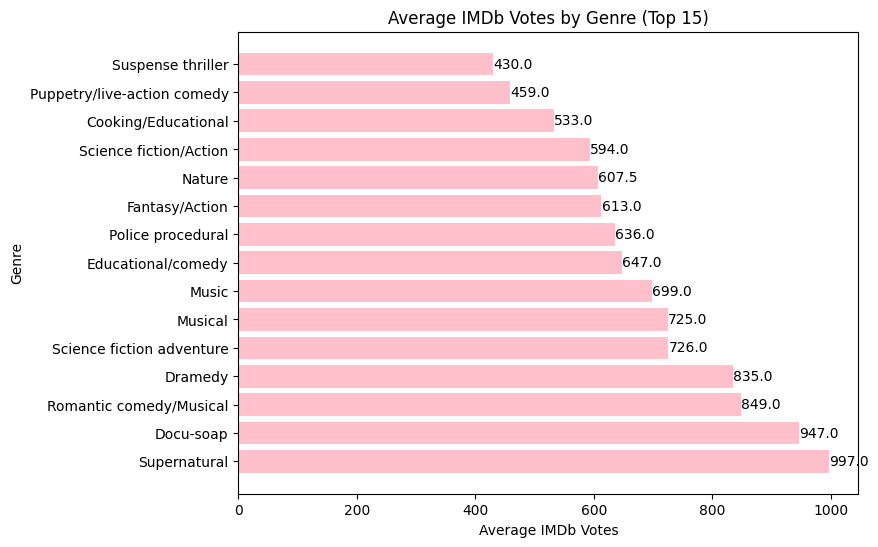

In [99]:
#get the average IMDB votes based on genres and create a bar chart
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('final_project.db')
cursor = conn.cursor()

# Get the top 15 genres based on the average IMDb votes
cursor.execute('SELECT Genre, AVG([IMDb Votes]) FROM final_project GROUP BY Genre ORDER BY AVG([IMDb Votes]) DESC LIMIT 15')
rows = cursor.fetchall()

genres = [row[0] for row in rows]
ratings = [row[1] for row in rows]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(genres, ratings, color = 'pink')
ax.set_xlabel('Average IMDb Votes')
ax.set_ylabel('Genre')
ax.set_title('Average IMDb Votes by Genre (Top 15)')

#show the values for each bar
for i, bar in enumerate(bars):
    rating = round(ratings[i], 2)
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(rating), ha='left', va='center')

plt.show()

cursor.close()
conn.close()

In [71]:
#stock price analysis: find mean, median, max, min, standard deviation
import pandas as pd

df = pd.read_csv("final.csv")

#look at the Close Price Column 
min = df['Close Price'].min()
max = df['Close Price'].max()
median = df['Close Price'].median()
mean = df['Close Price'].mean()
standard_deviation = df['Close Price'].std()

print("Minimum price: $", round(min,2))
print("Maximum price: $", round(max,0))
print("Median price: $", round(median,0))
print("Mean price: $", round(mean,0))
print("Standard deviation of price: $", round(standard_deviation,0))

Minimum price: $ 18.46
Maximum price: $ 692.0
Median price: $ 346.0
Mean price: $ 358.0
Standard deviation of price: $ 150.0


In [78]:
#finding the record with highest/lowest close price
import pandas as pd

df = pd.read_csv("final.csv")

# Find the record with the highest close price
highest_price_row = df.loc[df['Close Price'].idxmax()]
# Find the record with the lowest close price
lowest_price_row = df.loc[df['Close Price'].idxmin()]

# Print the row with the highest close price
print("Movie with highest close price:\n", highest_price_row)
print('\n')
# Print the row with the lowest close price
print("Movie with lowest close price:\n", lowest_price_row)


Movie with highest close price:
 Title            Tear Along the Dotted Line
Genre                                Comedy
Premiere Date                    2021-11-17
Language                            Italian
Country                               Italy
IMDb Rating                             8.6
IMDb Votes                            9,502
Close Price                      691.690002
Name: 241, dtype: object


Movie with lowest close price:
 Title                                                   Lilyhammer
Genre                                                        Drama
Premiere Date                                           2012-02-06
Language         Norwegian, English, Portuguese, Lithuanian, Ne...
Country                                      Norway, United States
IMDb Rating                                                    7.9
IMDb Votes                                                  30,816
Close Price                                              18.464287
Name: 991, dtype: ob

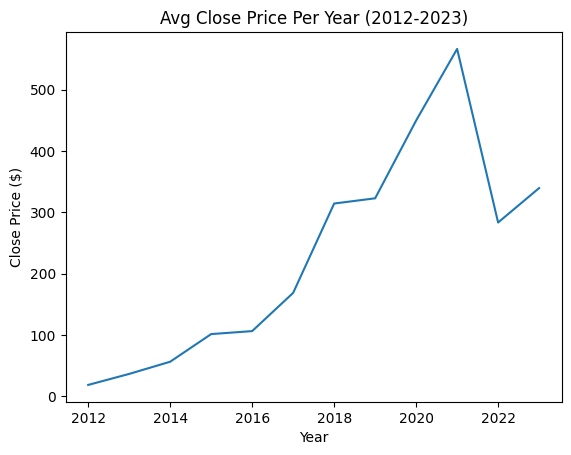

In [89]:
#creating a line graph with the close price avg per year
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("final.csv", parse_dates=["Premiere Date"])

#Premiere dates between 2012-2023
df_range = df[df["Premiere Date"].dt.year.isin(range(2012, 2024))]

#the avg close price for each year
df_range_mean = df_range.groupby(df_range["Premiere Date"].dt.year)["Close Price"].mean()

plt.plot(df_range_mean.index, df_range_mean.values)
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.title("Avg Close Price Per Year (2012-2023)")

plt.show()